In [1]:
!pip install sklearn.preprocessing

In [2]:
!pip install pykan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.3/77.3 kB 2.2 MB/s eta 0:00:00


In [13]:
from kan import *
from kan.utils import create_dataset_from_data
import torch
from sklearn.model_selection import train_test_split
import sklearn
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu" )
print(device)

S_model_hd = KAN(width=[7,5,1], grid=3, k=3, seed=1, device=device)
#B_model_hd = KAN(width=[5,10,1], grid=3, k=3, seed=42, device=device)



cpu
checkpoint directory created: ./model
saving model version 0.0


In [40]:
house_dataset_kan = pd.read_csv('/content/kc_house_data.csv')


house_dataset_kan.isnull().sum()
house_dataset_kan.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# house_dataset = HousePricesDataset(csv_file='/content/kc_house_data.csv')
house_dataset_kan = pd.read_csv('/content/kc_house_data.csv')



# features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'sqft_basement']
features = ['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_basement']

# house['bedrooms'], house['bathrooms'], house['sqft_living'], house['view'], house['grade'], house['sqft_above'], house['sqft_basement'], house['price']
# total_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode' ]

# house['bedrooms'], house['bathrooms'], house['sqft_living'], house['floors'], house['condition'], house['grade'],  house['sqft_basement'], house['price']

            # 'grade', 'view', 'sqft_above', 'sqft_basement', 'sqft_living', 'yr_built', 'yr_renovated',
            # 'waterfront' , 'zipcode'
label = 'price'

# Split the dataset into input features (X) and label (y)
X = house_dataset_kan[features]
y = house_dataset_kan[label]

# std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
X_normalized= minmax_scaler.fit_transform(X)



# Split the data into 70% train, 20% validation, and 10% test
# First, split 80% (train+validation) and 20% (test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_normalized, y, test_size=0.1, random_state=14)

# Next, split the 80% (train+validation) into 70% train and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=14)

# Print the shapes of the splits to verify
# print(f'Training set size: {X_train.shape[0]}')
# print(f'Validation set size: {X_val.shape[0]}')
# print(f'Test set size: {X_test.shape[0]}')

#Full dataset
# X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_train_s= X_train[:100,:]
Y_train_s= y_train[:100]

X_train_tensor_s = torch.tensor(X_train_s, dtype=torch.float32)
y_train_tensor_s = torch.tensor(Y_train_s.values, dtype=torch.float32)

# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)


# Creating dataset for the KAN from the data

# x = torch.rand(100,2)
# y = torch.rand(100,1)
dataset = create_dataset_from_data(X_train_tensor_s, y_train_tensor_s, device=device)
# print(dataset)






# house_dataset_kan_train, house_dataset_kan_validation, house_dataset_kan_test = torch.utils.data.random_split(house_dataset, [0.7, 0.2, 0.1])
# print(len(house_dataset_kan_train))
# print(len(house_dataset_kan_validation))
# print(len(house_dataset_kan_test))

# print(house_dataset_kan)
# print(house_dataset_kan)


In [42]:
print(X_train)

[[0.09090909 0.21875    0.08754717 0.        ]
 [0.09090909 0.25       0.09207547 0.        ]
 [0.09090909 0.34375    0.12075472 0.        ]
 ...
 [0.06060606 0.125      0.0309434  0.        ]
 [0.06060606 0.28125    0.08603774 0.        ]
 [0.09090909 0.3125     0.10943396 0.        ]]


In [43]:
print(y_train)

11781    265000.0
494      397500.0
19096    375000.0
21247    510000.0
4266     562000.0
           ...   
8408     699000.0
5401     295000.0
16409    225000.0
19715    522500.0
2661     225000.0
Name: price, Length: 15560, dtype: float64


In [6]:
print(dataset)

{'train_input': tensor([[0.0909, 0.3125, 0.1592, 0.0000, 0.6667, 0.2314, 0.0000],
        [0.0909, 0.1875, 0.0679, 0.7500, 0.5000, 0.0987, 0.0000],
        [0.1212, 0.3125, 0.2408, 0.0000, 0.6667, 0.3498, 0.0000],
        [0.1515, 0.4062, 0.2732, 0.0000, 0.6667, 0.2654, 0.2490],
        [0.0909, 0.3125, 0.1132, 0.0000, 0.5833, 0.1645, 0.0000],
        [0.0909, 0.1250, 0.0687, 0.0000, 0.5000, 0.0998, 0.0000],
        [0.0909, 0.3125, 0.1185, 0.0000, 0.5833, 0.1721, 0.0000],
        [0.1212, 0.3438, 0.1789, 0.0000, 0.5833, 0.1425, 0.2220],
        [0.1515, 0.3125, 0.1109, 0.0000, 0.4167, 0.1612, 0.0000],
        [0.1212, 0.3125, 0.1751, 0.0000, 0.5833, 0.2544, 0.0000],
        [0.0909, 0.3125, 0.1592, 0.0000, 0.6667, 0.2314, 0.0000],
        [0.0606, 0.1250, 0.0408, 0.0000, 0.4167, 0.0592, 0.0000],
        [0.1212, 0.3125, 0.2234, 0.0000, 0.7500, 0.3246, 0.0000],
        [0.1212, 0.2188, 0.1223, 0.0000, 0.5833, 0.1776, 0.0000],
        [0.0909, 0.2812, 0.1140, 0.0000, 0.5000, 0.1656, 0.0

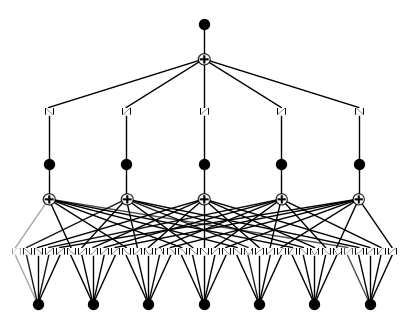

In [7]:
S_model_hd(dataset['train_input'])
S_model_hd.plot(beta= 100)

In [14]:
S_model_hd.fit(dataset, opt= "LBFGS", steps= 20, lamb= 0, lr= 0.9)

| train_loss: 3.52e+05 | test_loss: 2.65e+05 | reg: 1.78e+04 | : 100%|█| 20/20 [00:04<00:00,  4.91it

saving model version 0.1


{'train_loss': [array(361159.66, dtype=float32),
  array(352772.7, dtype=float32),
  array(351971.97, dtype=float32),
  array(351932.97, dtype=float32),
  array(351928.47, dtype=float32),
  array(351995.44, dtype=float32),
  array(351931.3, dtype=float32),
  array(351923.78, dtype=float32),
  array(351920.53, dtype=float32),
  array(351919.88, dtype=float32),
  array(352057.97, dtype=float32),
  array(351975., dtype=float32),
  array(351952.78, dtype=float32),
  array(351945.94, dtype=float32),
  array(351945.2, dtype=float32),
  array(352994.5, dtype=float32),
  array(352615.16, dtype=float32),
  array(352175.75, dtype=float32),
  array(352072.34, dtype=float32),
  array(352016.53, dtype=float32)],
 'test_loss': [array(273236.56, dtype=float32),
  array(265837.7, dtype=float32),
  array(264224.44, dtype=float32),
  array(265632.8, dtype=float32),
  array(265272.38, dtype=float32),
  array(265225.1, dtype=float32),
  array(265364.47, dtype=float32),
  array(265535.3, dtype=float32),
  

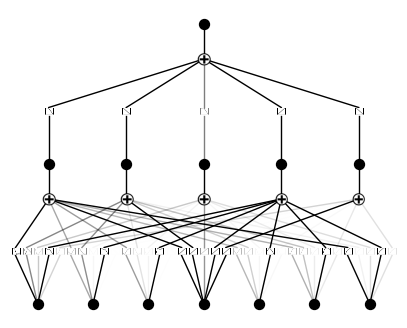

In [15]:
S_model_hd.plot(beta= 100)

saving model version 0.2


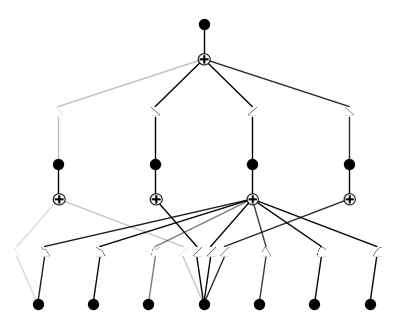

In [16]:
model = S_model_hd.prune()
model.plot()

In [17]:
model_a = S_model_hd.refine(10)

saving model version 0.2


In [18]:
model_a.fit(dataset, opt="LBFGS", steps=20, lr= 0.9);

| train_loss: nan | test_loss: nan | reg: nan | : 100%|█████████████| 20/20 [00:06<00:00,  2.94it/s]

saving model version 0.3


In [21]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    S_model_hd.fix_symbolic(0,0,0,'sin');
    S_model_hd.fix_symbolic(0,1,0,'x^2');
    S_model_hd.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    #model.fit(dataset, opt="LBFGS", steps=50) # Added this line to ensure activations are available
    S_model_hd.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.669239342212677, c=1
fixing (0,0,1) with x, r2=0.0028516727034002542, c=1
fixing (0,0,2) with 0
fixing (0,0,3) with x, r2=0.754431426525116, c=1
fixing (0,0,4) with x, r2=0.7287935614585876, c=1
fixing (0,1,0) with abs, r2=0.9987359642982483, c=3
fixing (0,1,1) with sin, r2=0.9999771118164062, c=2
fixing (0,1,2) with 0
fixing (0,1,3) with x, r2=0.8550702929496765, c=1
fixing (0,1,4) with sqrt, r2=0.9999894499778748, c=2
fixing (0,2,0) with x, r2=0.6599964499473572, c=1
fixing (0,2,1) with sin, r2=0.9922166466712952, c=2
fixing (0,2,2) with 0
fixing (0,2,3) with x, r2=0.5435519218444824, c=1
fixing (0,2,4) with x, r2=0.24004532396793365, c=1
fixing (0,3,0) with x, r2=1.000001311302185, c=1
fixing (0,3,1) with x, r2=1.000002145767212, c=1
fixing (0,3,2) with 0
fixing (0,3,3) with x, r2=1.0000022649765015, c=1
fixing (0,3,4) with x, r2=1.0000017881393433, c=1
fixing (0,4,0) with x, r2=0.2224971354007721, c=1
fixing (0,4,1) with x, r2=0.9352297782897949, c=1
fix

In [ ]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 1.96e-10 | test_loss: 1.44e-10 | reg: 0.00e+00 | : 100%|█| 50/50 [00:05<00:00,  8.78it

saving model version 0.7


In [22]:
from kan.utils import ex_round

ex_round(S_model_hd.symbolic_formula()[0][0],4)

-87530.0732*x_1 - 40907.5397*x_2 + 11862.9681*x_3 - 21545.3375*x_4 - 163.8594*x_5 - 31.796*x_6 - 136.1265*x_7 - 227483.0777*(0.3215 - x_6)**2 - 9933.0506*(0.5656 - x_5)**4 + 3.1999*sqrt(x_2 - 0.0703) + 43.6465*sin(8.9901*x_2 - 8.0015) - 14.765*sin(9.922*x_3 + 2.188) - 27.0838*sin(8.4143*x_6 + 4.592) + 17289.5943*sin(5.0799*x_7 + 6.4317) - 5058.9228*Abs(8.878*x_5 - 4.5391) + 576951.0914